In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder

In [2]:
data = pd.read_csv("titanic.csv", usecols=["age", "fare", "survived"])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data[["age", "fare"]],
    data["survived"],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [5]:
def impute_na(data, variable):
    df = data.copy()
    df[variable + "_random"] = df[variable]
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0
    )
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + "_random"] = random_sample
    
    return df[variable + "_random"]

In [6]:
X_train["age"] = impute_na(data, "age")
X_test["age"] = impute_na(data, "age")

X_train["fare"] = impute_na(data, "fare")
X_test["fare"] = impute_na(data, "fare")

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

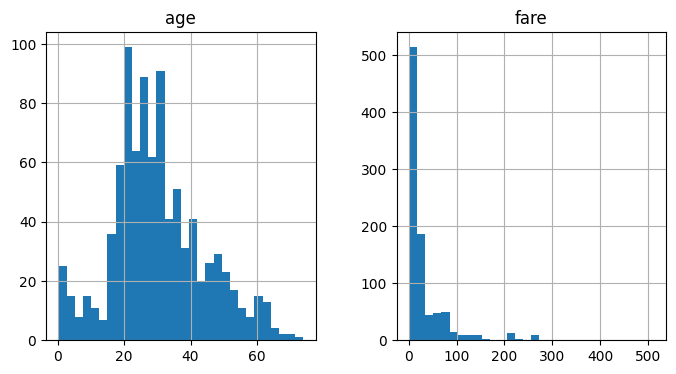

In [7]:
X_train[["age", "fare"]].hist(bins=30, figsize=(8, 4))

In [8]:
from sklearn.preprocessing import KBinsDiscretizer

disc = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="kmeans")
disc.fit(X_train[["age", "fare"]])

KBinsDiscretizer(encode='ordinal', strategy='kmeans')

In [11]:
disc.bin_edges_

array([array([ 0.1667    , 13.50716125, 26.24501412, 37.58671123, 51.55674859,
              74.        ])                                                   ,
       array([  0.        ,  40.82287474,  99.24961684, 183.28560044,
              373.625852  , 512.3292    ])                           ],
      dtype=object)

In [13]:
train_t = disc.transform(X_train[["age", "fare"]])
train_t = pd.DataFrame(train_t, columns=["age", "fare"])
train_t.head()

,age,fare
0,0.0,0.0
1,0.0,0.0
2,2.0,0.0
3,1.0,0.0
4,1.0,0.0
